<a href="https://colab.research.google.com/github/Ankushsaini90/Airbnb-data-analysis/blob/main/Ankush_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

#First let's talk about AIRNB

American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

The company has been criticized for possibly driving up home rents and creating nuisances for those living near leased properties. The company is regulated by many jurisdictions, including the European Union and cities such as San Francisco and New York City. It is viewed as a competitive threat by the hotel industry.

# Loading data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv('/content/Airbnb NYC 2019 (1).csv')

In [31]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [32]:
df.shape

(48895, 16)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [34]:
df.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#Observations


*   There are total 4 columns with null values
    

*   name has 16 null values
    
*  neighbourhood_group has 21 null values
   


*    last_reviews and reviews_per_month have many null values around 10052.



In [35]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [36]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

#Let us remove the columns that are not needed for the analysis

In [37]:
df.drop(['name','last_review'],axis=1, inplace=True)

In [38]:
df.head(1)

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365


#Replacing all the nan values in the reviews_per_month column with 0 since reviews can be 0

In [39]:
df.fillna({'reviews_per_month':0},inplace=True)

In [40]:
#Let's check the column
df.reviews_per_month.isna().sum()

0

#Now our data has no null values which means it is clean and ready for our analysis.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [42]:
df.shape

(48895, 14)

#Time for some analysis and visualization



*   Visualization of the different neighbourhood groups based on latitudes and longitudes
*   Correlation of price with other independent variables
*   Comparing the average prices of different neighbourhood groups
*   Comparing the average prices of different neighbourhoods and finding the top 10 neighbourhoods
*   Comparing differect room types with the prices based on the neighbourhood groups
*   Relationship between hosts and areas
*   Finding the busiest hosts
*   Most reviewed hosts
*   Room types and thier availability
*   Average stay in each room types



#Visualization of the different neighbourhood groups based on latitudes and longitudes

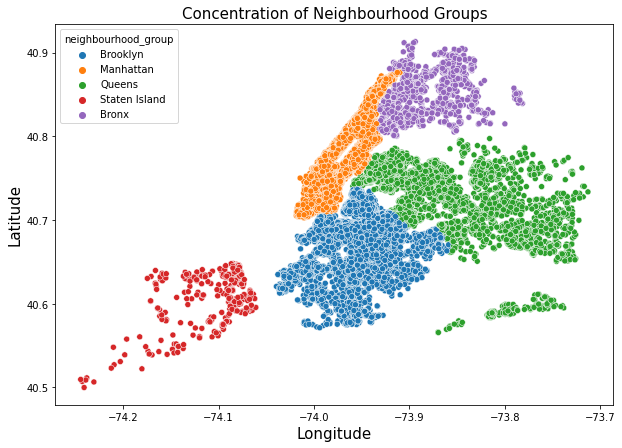

In [43]:
plt.figure(figsize=(10,7))
map = sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.title('Concentration of Neighbourhood Groups',fontsize=15,color='Black')
plt.ylabel('Latitude',fontsize=15,color='Black')
plt.xlabel('Longitude',fontsize=15,color='Black')
plt.show()


#Observations:


*   Here we can observe the concentration of all the neighbourhood groups we have in our data and how far they are located from each other





#Correlation of price with other independent variables

In [44]:
#Let us take all the columns with numeric data
numeric_df=df[['id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [45]:
correlation_df=numeric_df.corr()
correlation_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


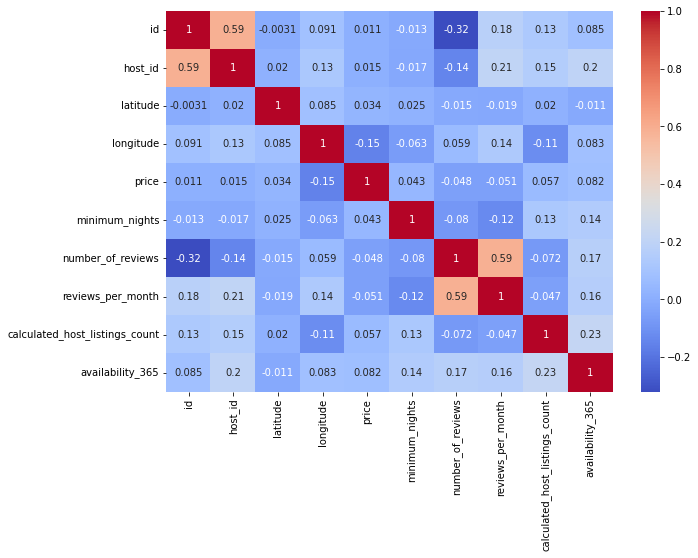

In [46]:

plt.figure(figsize=(10,7))
sns.heatmap(correlation_df,cmap='coolwarm', annot=True)

#observations:


*   Based on the correlation plot, price does not have a strong relationship with any independent variables. Also, there is little to no relationship amongst independant variables. Thus we can streamline our analysis towards categorical data with independent variables




#Comparing the average prices of different neighbourhood groups 

In [47]:
#Let us see the unique neighbourhood groups in our data
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [48]:
mean_price_ng=df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
mean_price_ng

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

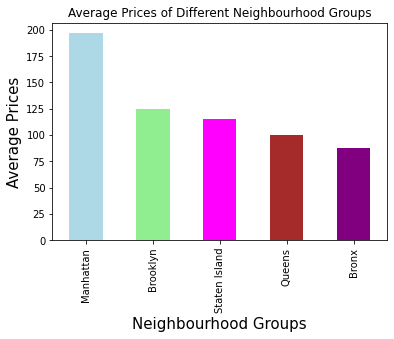

In [49]:
#Plotting a bar gragh
mean_price_ng.plot(kind='bar',color=['lightblue','lightgreen','magenta','brown','purple'])
plt.title('Average Prices of Different Neighbourhood Groups')
plt.ylabel('Average Prices',fontsize=15,color='Black')
plt.xlabel('Neighbourhood Groups',fontsize=15,color='Black')
plt.rcParams['figure.figsize'] = (10, 7)

#Observations:


*   Manhatten has the highest average price which makes it the costliest neighbourhood group
*   Brooklyn, Staten Island, Queens and Bronx have average prices that are in a decreasing trend




#Comparing the average prices of different neighbourhood groups 

In [50]:
neighbourhood_df=df.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().sort_values(ascending=False).reset_index(name='Average price')
neighbourhood_df.iloc[:10]

,neighbourhood,neighbourhood_group,Average price
0,Fort Wadsworth,Staten Island,800.000000
1,Woodrow,Staten Island,700.000000
2,Tribeca,Manhattan,490.638418
3,Sea Gate,Brooklyn,487.857143
4,Riverdale,Bronx,442.090909
5,Prince's Bay,Staten Island,409.500000
6,Battery Park City,Manhattan,367.557143
7,Flatiron District,Manhattan,341.925000
8,Randall Manor,Staten Island,336.000000
9,NoHo,Manhattan,295.717949


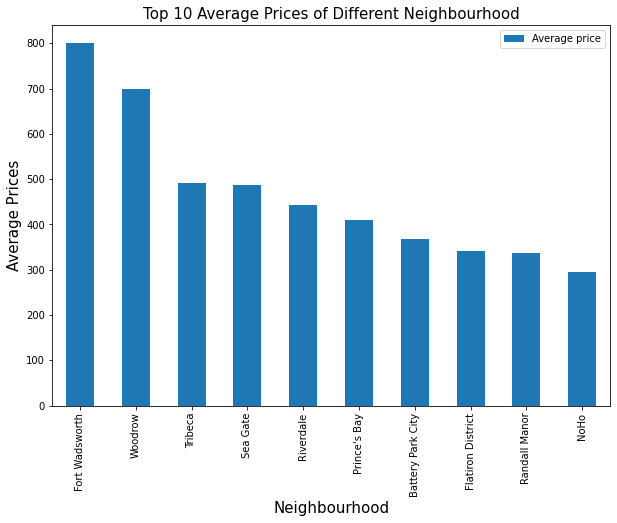

In [51]:
#plotting a bar graph
neighbourhood_df.iloc[:10].plot(kind='bar',x='neighbourhood')
plt.title('Top 10 Average Prices of Different Neighbourhood',fontsize=15)
plt.ylabel('Average Prices',fontsize=15,color='Black')
plt.xlabel('Neighbourhood',fontsize=15,color='Black')
plt.rcParams['figure.figsize'] = (10, 7)

#Observations


*   Fort Wadsworth which belongs to Staten Island has the highest average price
*   Woodrow has second highest price
*    Tribeca and Sea Gate stand at third and fourth respectively with minute difference








#Comparing differect room types with the prices based on the neighbourhood groups

In [54]:
#Finding the diffrent room types
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [55]:
room_type_vs_price=df.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index()
room_type_vs_price.rename(columns=({'price':'average_price'}))

,room_type,neighbourhood_group,average_price
0,Entire home/apt,Bronx,127.506596
1,Entire home/apt,Brooklyn,178.327545
2,Entire home/apt,Manhattan,249.239109
3,Entire home/apt,Queens,147.050573
4,Entire home/apt,Staten Island,173.846591
5,Private room,Bronx,66.788344
6,Private room,Brooklyn,76.500099
7,Private room,Manhattan,116.776622
8,Private room,Queens,71.762456
9,Private room,Staten Island,62.292553


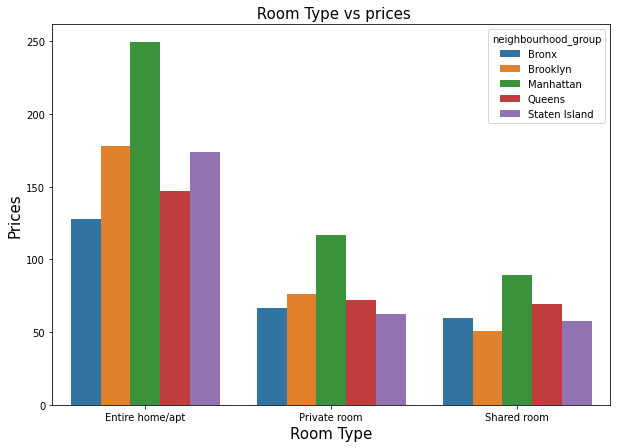

In [56]:
#plotting a graph
plt.figure(figsize = (10,7))
graph1 = sns.barplot(y='price',x='room_type',hue='neighbourhood_group', data=room_type_vs_price)
graph1.set_title(' Room Type vs prices',fontsize=15,color='Black')
graph1.set_xlabel('Room Type',fontsize=15,color='Black')
graph1.set_ylabel('Prices',fontsize=15,color='Black')
plt.show()

#Observations


*   Entire home/apt has the highest prices in all neighbourhood groups compared to other room types making it the most expensive room type.  
*   Private rooms are slightly costlier than the  Shared rooms in all the neighbourhood groups





#Relationship between hosts and areas

In [57]:
#Finding the number of hosts in each neighbourhood group 
host_areas=df.groupby('neighbourhood_group')['host_name'].nunique().sort_values(ascending=False)
host_areas.reset_index(name='number_of_hosts')

,neighbourhood_group,number_of_hosts
0,Brooklyn,6075
1,Manhattan,5972
2,Queens,2424
3,Bronx,652
4,Staten Island,220


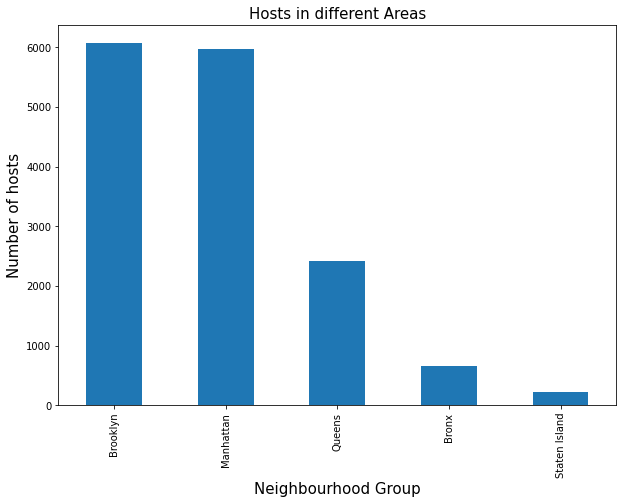

In [58]:
#plotting a bar graph
host_areas.plot(kind='bar',x='neighbourhood_group')
plt.title('Hosts in different Areas',fontsize=15,color='Black')
plt.ylabel('Number of hosts',fontsize=15,color='Black')
plt.xlabel('Neighbourhood Group',fontsize=15,color='Black')
plt.rcParams['figure.figsize'] = (10, 7)

#Observations:


*  Manhattan and Brooklyn have the highest number of hosts as compare to others,this could be because more people commute for work to these places
    
*  Staten island have the lowest number of hosts.



#Hosts that have maximum listings

In [59]:
listing_hosts=df.groupby('host_name')['calculated_host_listings_count'].max().sort_values(ascending=False).iloc[:10].reset_index(name='number_of_listings')
listing_hosts

,host_name,number_of_listings
0,Sonder (NYC),327
1,Blueground,232
2,Kara,121
3,Kazuya,103
4,Sonder,96
5,Jeremy & Laura,96
6,Corporate Housing,91
7,Ken,87
8,Pranjal,65
9,Mike,52


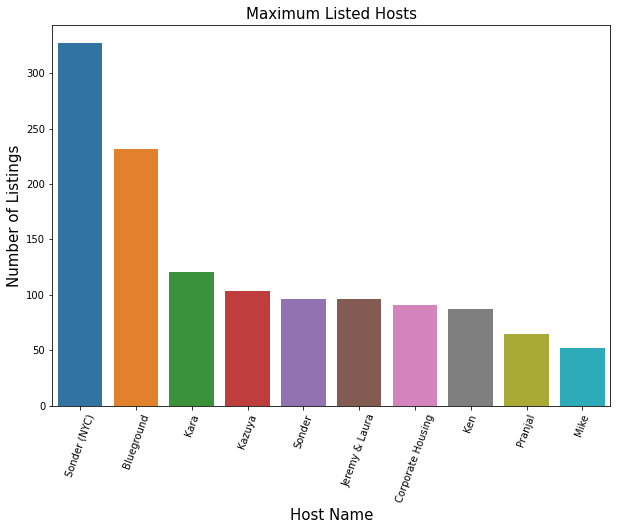

In [60]:
plt.figure(figsize = (10,7))
listing_host_df=sns.barplot(x='host_name',y='number_of_listings',data=listing_hosts)
listing_host_df.set_title('Maximum Listed Hosts',fontsize=15,color='Black')
listing_host_df.set_ylabel('Number of Listings',fontsize=15,color='Black')
listing_host_df.set_xlabel('Host Name',fontsize=15,color='Black')
listing_host_df.set_xticklabels(listing_host_df.get_xticklabels(), rotation=70)
plt.show()

In [61]:
#Finding the neighbourhoods that our busiest host Sonder(NYC)
host=df.loc[df['host_name']=='Sonder (NYC)']
neighbourhood_hosts=host['neighbourhood'].unique()
group=host['neighbourhood_group'].unique()
print('The neighbourhoods in which our most listed host Sonder(NYC) hosts are '+ ",".join(neighbourhood_hosts))
print(f'All of them belong to the neighbourhood group {",".join(group)}.')

The neighbourhoods in which our most listed host Sonder(NYC) hosts are Financial District,Murray Hill,Hell's Kitchen,Midtown,Theater District,Chelsea,Upper East Side
All of them belong to the neighbourhood group Manhattan.


#Observations:


*   Clearly, Sonder(NYC) is the host that is most listed with a maximum of above 300 listings
*   Blueground and Kara stand at second and third respectively



#Most reviewed hosts

In [62]:
hosts_reviewed=df.groupby('host_name')['reviews_per_month'].max().sort_values(ascending=False)[:10].reset_index(name='max_reviews_per_month')
hosts_reviewed

,host_name,max_reviews_per_month
0,Row NYC,58.50
1,Louann,20.94
2,Nalicia,19.75
3,Danielle,16.22
4,Brent,15.78
5,Lakshmee,15.32
6,Dona,14.58
7,Sam,14.00
8,Alina,14.00
9,Yvonne,13.48


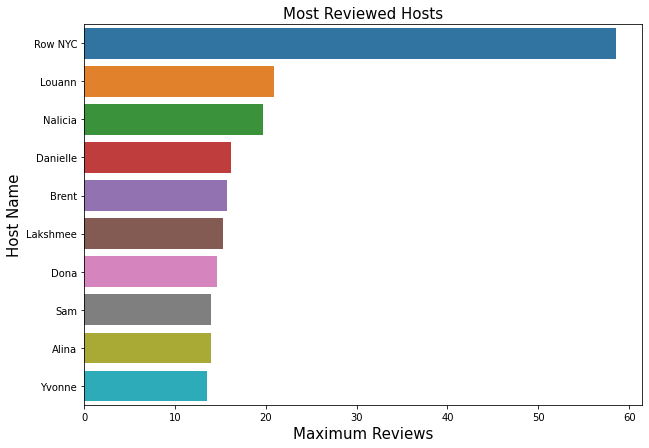

In [63]:
plt.figure(figsize = (10,7))
hosts_reviewed_df=sns.barplot(x='max_reviews_per_month',y='host_name',data=hosts_reviewed)
hosts_reviewed_df.set_title('Most Reviewed Hosts',fontsize=15,color='Black')
hosts_reviewed_df.set_ylabel('Host Name',fontsize=15,color='Black')
hosts_reviewed_df.set_xlabel('Maximum Reviews',fontsize=15,color='Black')
plt.show()

#Observations:


*   Row NYC is the most reviewed host with more than 50 reveiws per month
*  Louann, Nalicia, Daniella, Brent are others that had the most reviews in the top 5



#Neighbourhood groups and their availability 

In [64]:
availability_df=df.groupby(['neighbourhood_group'])['availability_365'].mean()
availability_df.reset_index()

,neighbourhood_group,availability_365
0,Bronx,165.758937
1,Brooklyn,100.232292
2,Manhattan,111.979410
3,Queens,144.451818
4,Staten Island,199.678284


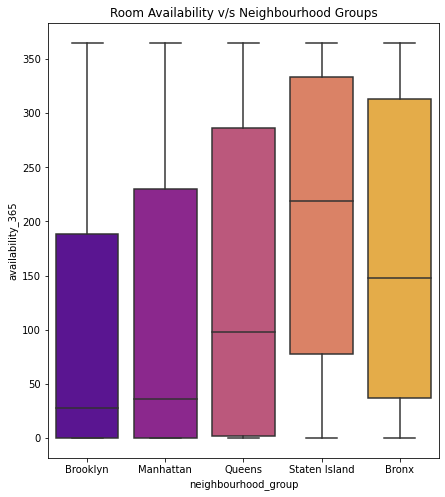

In [65]:
plt.figure(figsize=(7,8))
grp= sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette = 'plasma')
plt.title('Room Availability v/s Neighbourhood Groups')
grp

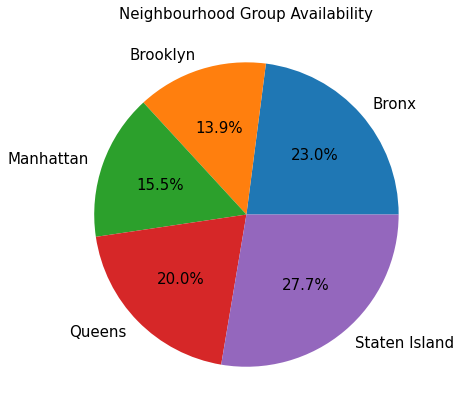

In [66]:
#Plotting our data
availability_df.plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('Neighbourhood Group Availability',fontsize=15,color='black')
plt.ylabel('')
plt.rcParams['figure.figsize'] = (10, 7)

#Observations


*   For Brooklyn the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 0 - 185 where median is 25.
*   For Manhattan the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 0 - 230 where median is 30.
*   For Queens the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 2 - 280 where median is 95.
*   For Staten Island the plot varies between minimum 0 to maximum 365. The Q1 and Q3 for that is 75-325 where median is 220.
*   For Bronx the plot varies between minimum o to maximum 365. The Q1 and Q3 for that is 30-312 where median is 150


#Room types and their availability

In [67]:
#Let us check the room types availability
room_type_availability=df.groupby('room_type')['availability_365'].mean().sort_values(ascending=False)
room_type_availability.reset_index()

,room_type,availability_365
0,Shared room,162.000862
1,Entire home/apt,111.920304
2,Private room,111.203933


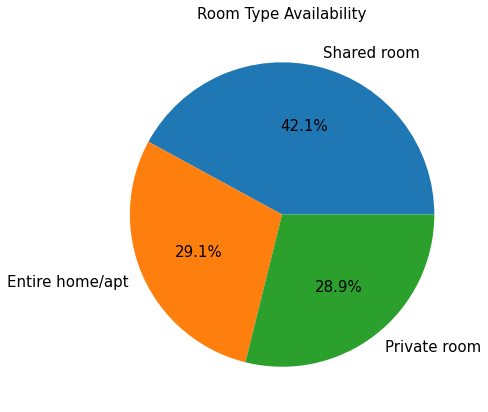

In [68]:
#Plotting our data using a pie chart
room_type_availability.plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title('Room Type Availability',fontsize=15,color='black')
plt.ylabel('')
plt.rcParams['figure.figsize'] = (10, 7)

#Observations:


*   Clearly the Shared rooms have a availability of over 40% which makes it the most available room type throughout the year
*   Both Entire home/apartment and private rooms have almost similar availability with 29.1% and 28.9% respectively



#Average stay in each room types


In [69]:
#Grouping the room types their neighbourhood groups with the minimun nights stayed
avg_stay=df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().reset_index(name='average_nights_stayed')
avg_stay

,neighbourhood_group,room_type,average_nights_stayed
0,Bronx,Entire home/apt,5.957784
1,Bronx,Private room,3.858896
2,Bronx,Shared room,3.366667
3,Brooklyn,Entire home/apt,6.531332
4,Brooklyn,Private room,5.539479
5,Brooklyn,Shared room,7.753027
6,Manhattan,Entire home/apt,10.539283
7,Manhattan,Private room,5.446880
8,Manhattan,Shared room,6.766667
9,Queens,Entire home/apt,5.369752


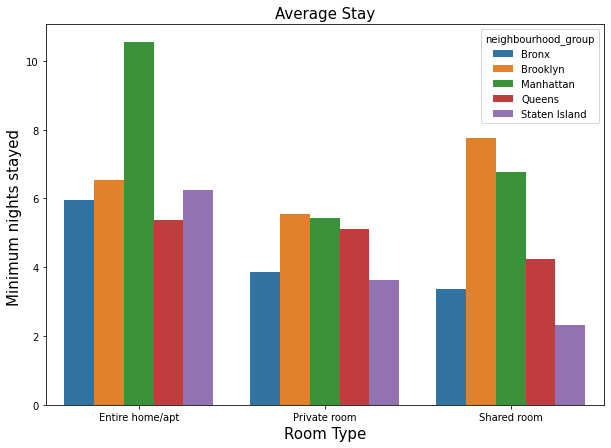

In [70]:
#Plotting the data
plt.figure(figsize = (10,7))
stay = sns.barplot(y='average_nights_stayed',x='room_type',hue='neighbourhood_group',data=avg_stay)
stay.set_title('Average Stay',fontsize=15,color='Black')
stay.set_xlabel('Room Type',fontsize=15,color='Black')
stay.set_ylabel('Minimum nights stayed ',fontsize=15,color='Black')
plt.show()

#Observations:


*   We can clearly say that most people likely to stay longer in entire homes/apartments with an average of 8 nights
*   The next thing guests prefer to stay longer are the shared rooms

